In [43]:
import pandas as pd

In [2]:
dfStart = pd.read_csv('start.csv', header = None)
dfStart.columns = ['Stock', 'Price']
dfStart.sort_values(by = ['Stock'], inplace = True)
dfStart = dfStart.reset_index(drop=True)

In [3]:
dfTrades = pd.read_csv('trades.csv', header = None)
dfTrades.columns = ['Stock', 'Trades']

In [4]:
dfTable = pd.read_html('table.html')[0]
dfTable.rename(columns={"Symbol": "Stock"}, inplace=True)
#pip3 install lxml

In [5]:
dfEnd = dfTrades.groupby([dfTrades['Stock']]).sum()
dfEnd.sort_values(by = ['Stock'], inplace = True)
dfEnd.reset_index(level = ['Stock'], inplace = True)

In [6]:
a=[]
b=[]
for s,t in dfStart.iterrows():
    a.append(t['Stock'])
for p,q in dfEnd.iterrows():
    b.append(q['Stock'])
print(list(set(b)-set(a)))
print(list(set(a)-set(b)))

['FCX', 'DGX', 'STZ', 'ALL', 'SNA', 'ACN', 'M', 'MO', 'KMI', 'UNP', 'ADS', 'PVH', 'LW']
['AIZ', 'T', 'AXP']


In [7]:
dfAppendToStart = pd.DataFrame([['PVH',0], ['ALL', 0], ['MO',0], ['ADS',0], ['LW',0], ['FCX',0], ['DGX',0], ['STZ',0], ['M',0], ['SNA',0], ['KMI',0], ['UNP',0], ['ACN',0]])
dfAppendToStart.columns = ['Stock', 'Price']
dfStart = dfStart.append(dfAppendToStart, ignore_index=True)
dfStart.sort_values(by = ['Stock'], inplace = True)
dfStart = dfStart.reset_index(drop=True)

In [8]:
dfAppendToEnd = pd.DataFrame([['AXP',0], ['T',0], ['AIZ',0]])
dfAppendToEnd.columns = ['Stock', 'Trades']
dfEnd = dfEnd.append(dfAppendToEnd, ignore_index=True)
dfEnd.sort_values(by = ['Stock'], inplace = True)
dfEnd = dfEnd.reset_index(drop=True)

In [9]:
dfEnd['Final Price'] = dfStart['Price'] + dfEnd['Trades']

In [10]:
dfEnd = dfEnd.drop(columns=['Trades'], axis = 1)
dfEnd.to_csv('eod.csv',index = False)

In [11]:
## Part 3

In [12]:
dfMerge = pd.merge(dfEnd, dfTable, how = 'left', on = 'Stock')
dfMerge = dfMerge.drop(columns = ['Final Price', 'Security','SEC filings', 'GICS Sub Industry', 'Headquarters Location', 'Date first added', 'CIK', 'Founded'], axis = 1)
dfSector = dfMerge.groupby(['GICS Sector']).agg(['count'])
dfSector.to_csv('sector.csv')

In [13]:
## Part 4

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

In [14]:
dfHQ = dfTable
dfHQ = dfHQ.drop(columns = ['GICS Sector', 'Security','SEC filings', 'GICS Sub Industry', 'Date first added', 'CIK', 'Founded'], axis = 1)
dfHQ = dfHQ.groupby(['Headquarters Location']).agg(['count'])
dfHQ = dfHQ.reset_index()

In [16]:
from opencage.geocoder import OpenCageGeocode

In [17]:
key = '44f3828578204a568c47f5f7047dcf0f'
geocoder = OpenCageGeocode(key)

In [29]:
list_lat = []
list_long = []
for index, row in dfHQ.iterrows():
    
    Address = row['Headquarters Location'][0]
    query = str(Address)

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(long)

dfHQ['lat'] = list_lat   
dfHQ['lon'] = list_long

In [54]:
print(dfHQ.lon.min())
print(dfHQ.lon.max())
print(dfHQ.lat.min())
print(dfHQ.lat.max())

# Maps are too big in size for API

-123.0587907
87.91667
25.7742658
53.3497645


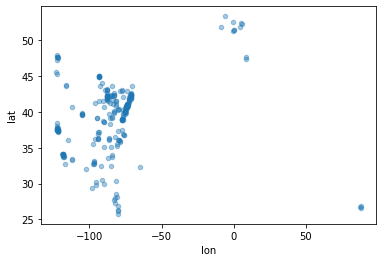

In [55]:
dfHQ.plot(kind="scatter", x="lon", y="lat", alpha=0.4)
plt.show()